# Dense network

For the last section, I will try to use the pre-trained model with the dense network. I will first try with only 1-layer dense network and then with 2-layers. Let's start by importing the data.

In [1]:
import os
import pandas as pd
import numpy as np

# Import train data
with np.load(os.path.join('processed_data', 'features_tr.npz'), allow_pickle=False) as data:
    features = dict(data.items())
X_tr = features['x']
y_tr = features['y']

# import validation data
with np.load(os.path.join('processed_data', 'features_va.npz'), allow_pickle=False) as data:
    features_va = dict(data.items())
X_va = features_va['x']
y_va = features_va['y']

#import raw test Images
with np.load(os.path.join('processed_data', 'features_te.npz'), allow_pickle=False) as data:
    features_te = dict(data.items())
    
# Create X/y arrays
X_te = features_te['x']
y_te = features_te['y']

## 1-layer dense network

Now we will implement a 1-layer fully-connected (dense) neural network for our data.

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import optimizers

# Dense network
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=[2048]))
model.add(keras.layers.Dense(6, activation='softmax'))
model.summary()

# Define loss function, optimizer and metrics to track during training
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12294     
Total params: 12,294
Trainable params: 12,294
Non-trainable params: 0
_________________________________________________________________


Now that our model is prepared, we can fit the data and visualize the results

In [3]:
# Train model
one_layer_model = model.fit(
    x=X_tr, y=y_tr, validation_data = (X_va, y_va), epochs=50, shuffle=True)

Train on 280 samples, validate on 139 samples
Epoch 1/50
280/280 [==============================] - 0s 847us/step - loss: 0.9783 - acc: 0.6893 - val_loss: 0.4353 - val_acc: 0.8705
Epoch 2/50
280/280 [==============================] - 0s 39us/step - loss: 0.2717 - acc: 0.9286 - val_loss: 0.3335 - val_acc: 0.8777
Epoch 3/50
280/280 [==============================] - 0s 44us/step - loss: 0.1712 - acc: 0.9464 - val_loss: 0.2962 - val_acc: 0.8849
Epoch 4/50
280/280 [==============================] - 0s 46us/step - loss: 0.1223 - acc: 0.9679 - val_loss: 0.2848 - val_acc: 0.9065
Epoch 5/50
280/280 [==============================] - 0s 42us/step - loss: 0.0928 - acc: 0.9893 - val_loss: 0.2754 - val_acc: 0.9065
Epoch 6/50
280/280 [==============================] - 0s 43us/step - loss: 0.0757 - acc: 0.9893 - val_loss: 0.2698 - val_acc: 0.9065
Epoch 7/50
280/280 [==============================] - 0s 39us/step - loss: 0.0625 - acc: 0.9929 - val_loss: 0.2665 - val_acc: 0.9065
Epoch 8/50
280/280 [==

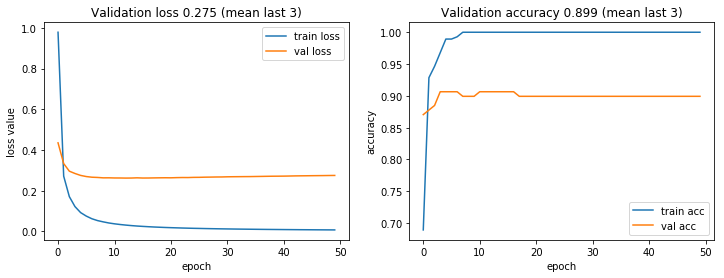

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(one_layer_model.history['loss'], label='train loss')
ax1.plot(one_layer_model.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(one_layer_model.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(one_layer_model.history['acc'], label='train acc')
ax2.plot(one_layer_model.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(one_layer_model.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

With the 1-layer dense network, we reach a validation accuracy of ~89%. We can see that the validation loss and accuracy reach a plateau after 10 epochs. The model then starts overfitting. Let's now evaluate the test score.

In [5]:
# Store the accuracy
test_acurracy = model.evaluate(X_te, y_te)[1]
one_layer_test_score = pd.DataFrame(data = {'model': ["1-layer nn"], 'test_accuracy': [test_acurracy]})
%store one_layer_test_score

50/50 [==============================] - 0s 38us/step
Stored 'one_layer_test_score' (DataFrame)


## 2-layer dense network
What happens if we add a second "hidden layer"?

In [6]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import optimizers

# Dense network
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(16, activation='relu', input_shape=[2048]))
model_2.add(keras.layers.Dense(6, activation='softmax'))
model_2.summary()

# Define loss function, optimizer and metrics to track during training
model_2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
Total params: 32,886
Trainable params: 32,886
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train model
two_layer_model = model_2.fit(
    x=X_tr, y=y_tr, validation_data = (X_va, y_va), epochs=50, shuffle=True)

Train on 280 samples, validate on 139 samples
Epoch 1/50
280/280 [==============================] - 0s 1ms/step - loss: 1.3071 - acc: 0.4786 - val_loss: 0.6220 - val_acc: 0.8201
Epoch 2/50
280/280 [==============================] - 0s 74us/step - loss: 0.5345 - acc: 0.8464 - val_loss: 0.4290 - val_acc: 0.8633
Epoch 3/50
280/280 [==============================] - 0s 81us/step - loss: 0.3464 - acc: 0.9000 - val_loss: 0.3577 - val_acc: 0.8921
Epoch 4/50
280/280 [==============================] - 0s 73us/step - loss: 0.2556 - acc: 0.9357 - val_loss: 0.3208 - val_acc: 0.9065
Epoch 5/50
280/280 [==============================] - 0s 74us/step - loss: 0.2010 - acc: 0.9607 - val_loss: 0.2986 - val_acc: 0.9281
Epoch 6/50
280/280 [==============================] - 0s 77us/step - loss: 0.1643 - acc: 0.9714 - val_loss: 0.2828 - val_acc: 0.9281
Epoch 7/50
280/280 [==============================] - 0s 78us/step - loss: 0.1391 - acc: 0.9786 - val_loss: 0.2713 - val_acc: 0.9424
Epoch 8/50
280/280 [====

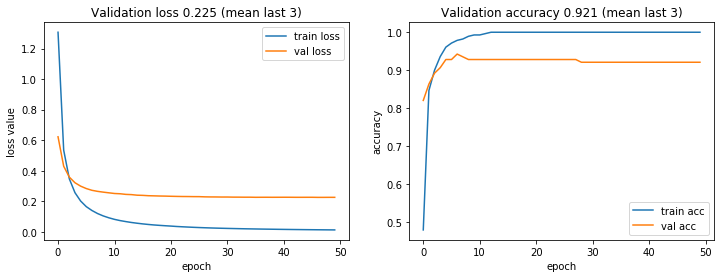

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(two_layer_model.history['loss'], label='train loss')
ax1.plot(two_layer_model.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(two_layer_model.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(two_layer_model.history['acc'], label='train acc')
ax2.plot(two_layer_model.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(two_layer_model.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

With one hidden layer, we observe that we get more or less the same results. It depends on the randomness of algorithms and approximaiton. As already mentioned several times. The pre-trained model is already really good. It is thus difficult to have better results.

In [9]:
# Store the accuracy
test_acurracy = model_2.evaluate(X_te, y_te)[1]
two_layer_test_score = pd.DataFrame(data = {'model': ["2-layer nn"], 'test_accuracy': [test_acurracy]})
%store two_layer_test_score

50/50 [==============================] - 0s 75us/step
Stored 'two_layer_test_score' (DataFrame)
